<a href="https://colab.research.google.com/github/M-S-ibrahim/ArewaDS-Deep-Learning-/blob/main/Exercises4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [5]:
# Check for GPU
!nvidia-smi

Thu Apr 24 23:37:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

In [2]:
print("1. Self-driving cars: Computer vision is used to identify objects such as pedestrians, other vehicles, and traffic signals, enabling autonomous navigation.")
print("2. Medical imaging: Computer vision algorithms are used to analyze medical images like X-rays, CT scans, and MRIs to detect diseases and abnormalities.")
print("3. Retail analytics: Computer vision can track customer behavior, optimize store layouts, and enhance the shopping experience.")

1. Self-driving cars: Computer vision is used to identify objects such as pedestrians, other vehicles, and traffic signals, enabling autonomous navigation.
2. Medical imaging: Computer vision algorithms are used to analyze medical images like X-rays, CT scans, and MRIs to detect diseases and abnormalities.
3. Retail analytics: Computer vision can track customer behavior, optimize store layouts, and enhance the shopping experience.


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [3]:
print("Overfitting in machine learning occurs when a model learns the training data too well, including its noise and outliers, and thus performs poorly on unseen data.")

Overfitting in machine learning occurs when a model learns the training data too well, including its noise and outliers, and thus performs poorly on unseen data.


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [4]:
print("1. Data augmentation: Artificially increasing the size and diversity of the training dataset by applying transformations like rotations, flips, and crops helps the model generalize better.")
print("2. Regularization: Techniques like L1 and L2 regularization add penalty terms to the loss function, discouraging the model from assigning excessively large weights to individual features, thus reducing overfitting.")
print("3. Dropout: Randomly deactivating neurons during training forces the network to learn more robust features, preventing reliance on specific neurons and improving generalization to unseen data.")

1. Data augmentation: Artificially increasing the size and diversity of the training dataset by applying transformations like rotations, flips, and crops helps the model generalize better.
2. Regularization: Techniques like L1 and L2 regularization add penalty terms to the loss function, discouraging the model from assigning excessively large weights to individual features, thus reducing overfitting.
3. Dropout: Randomly deactivating neurons during training forces the network to learn more robust features, preventing reliance on specific neurons and improving generalization to unseen data.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
print('its very impactful, i learned about CNN and everthing related to it')

its very impactful, i learned about CNN and everthing related to it


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.94MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.70MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

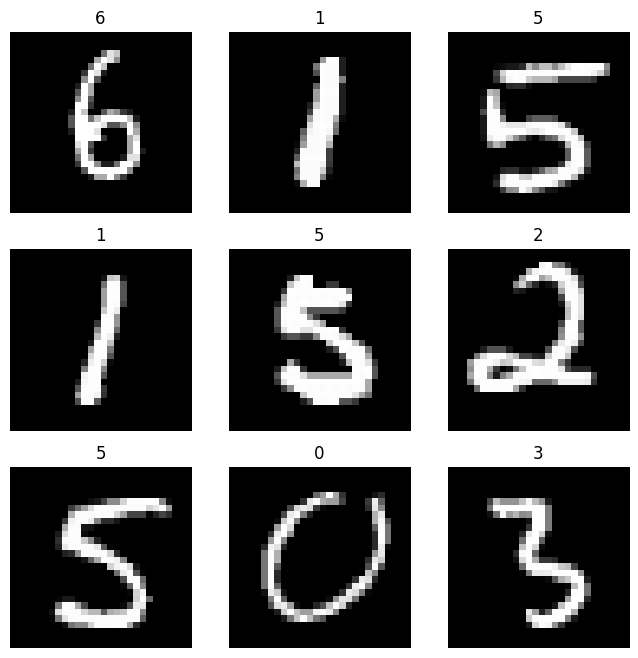

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

# Create dataloaders
train_dataloader = DataLoader(training_data, batch_size=32)
test_dataloader = DataLoader(test_data, batch_size=32)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [11]:
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [12]:
# Example usage with MNIST (1 input channel, 10 output classes)
model_2 = TinyVGG(input_shape=1, hidden_units=10, output_shape=10).to(device)
model_2

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
import time

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Training loop for CPU
start_time = time.time()
model_2.to("cpu") # Ensure model is on CPU

# Re-initialize optimizer with model parameters on CPU
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to("cpu"), y.to("cpu") # Ensure data is on CPU

        # Compute prediction and loss
        pred = model_2(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(train_dataloader.dataset):>5d}]")

end_time = time.time()
cpu_time = end_time - start_time
print(f"\nTraining time on CPU: {cpu_time:.2f} seconds")



Using device: cuda
Epoch 1
-------------------------------
loss: 0.006346  [    0/60000]
loss: 0.012411  [ 3200/60000]
loss: 0.014230  [ 6400/60000]
loss: 0.027885  [ 9600/60000]
loss: 0.010218  [12800/60000]
loss: 0.017930  [16000/60000]
loss: 0.001804  [19200/60000]
loss: 0.004189  [22400/60000]
loss: 0.013697  [25600/60000]
loss: 0.025336  [28800/60000]
loss: 0.157208  [32000/60000]
loss: 0.025392  [35200/60000]
loss: 0.085766  [38400/60000]
loss: 0.036804  [41600/60000]
loss: 0.008893  [44800/60000]
loss: 0.019274  [48000/60000]
loss: 0.084184  [51200/60000]
loss: 0.003313  [54400/60000]
loss: 0.032344  [57600/60000]
Epoch 2
-------------------------------
loss: 0.007918  [    0/60000]
loss: 0.003603  [ 3200/60000]
loss: 0.021128  [ 6400/60000]
loss: 0.014179  [ 9600/60000]
loss: 0.008430  [12800/60000]
loss: 0.011982  [16000/60000]
loss: 0.001250  [19200/60000]
loss: 0.005059  [22400/60000]
loss: 0.015569  [25600/60000]
loss: 0.022557  [28800/60000]
loss: 0.139745  [32000/60000]
l

In [16]:
# Training loop for GPU
if torch.cuda.is_available(): # Only run if GPU is available
    start_time = time.time()
    model_2.to(device) # Ensure model is on GPU

    # Re-initialize optimizer with model parameters on CPU
    optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")
        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device) # Ensure data is on GPU

            # Compute prediction and loss
            pred = model_2(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{len(train_dataloader.dataset):>5d}]")

    end_time = time.time()
    gpu_time = end_time - start_time
    print(f"\nTraining time on GPU: {gpu_time:.2f} seconds")
else:
  print("GPU not available")

Epoch 1
-------------------------------
loss: 0.005613  [    0/60000]
loss: 0.000768  [ 3200/60000]
loss: 0.037686  [ 6400/60000]
loss: 0.030859  [ 9600/60000]
loss: 0.066155  [12800/60000]
loss: 0.001358  [16000/60000]
loss: 0.000314  [19200/60000]
loss: 0.000502  [22400/60000]
loss: 0.004632  [25600/60000]
loss: 0.014161  [28800/60000]
loss: 0.183133  [32000/60000]
loss: 0.123919  [35200/60000]
loss: 0.030366  [38400/60000]
loss: 0.036516  [41600/60000]
loss: 0.004151  [44800/60000]
loss: 0.013888  [48000/60000]
loss: 0.031138  [51200/60000]
loss: 0.001263  [54400/60000]
loss: 0.012546  [57600/60000]
Epoch 2
-------------------------------
loss: 0.004732  [    0/60000]
loss: 0.001248  [ 3200/60000]
loss: 0.019690  [ 6400/60000]
loss: 0.024455  [ 9600/60000]
loss: 0.021444  [12800/60000]
loss: 0.001889  [16000/60000]
loss: 0.000555  [19200/60000]
loss: 0.000355  [22400/60000]
loss: 0.011265  [25600/60000]
loss: 0.010320  [28800/60000]
loss: 0.180732  [32000/60000]
loss: 0.036550  [352

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [17]:
import matplotlib.pyplot as plt

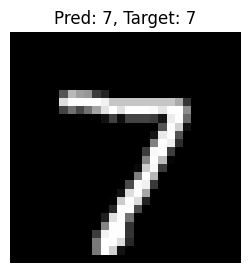

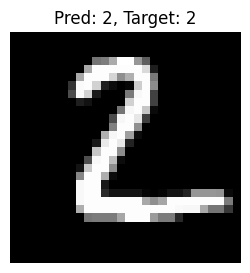

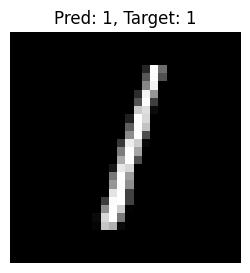

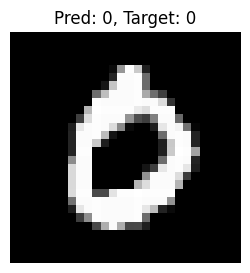

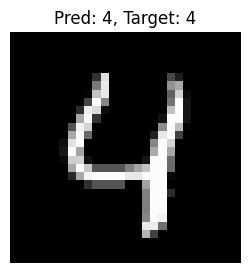

In [18]:
# Get a batch of test data
for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    break

# Make predictions
with torch.inference_mode():
  pred_probs = model_2(X)
  pred_labels = torch.argmax(pred_probs, dim=1)

# Visualize predictions
n_samples = 5
for i in range(n_samples):
  plt.figure(figsize=(3,3))
  plt.imshow(X[i].squeeze().cpu(), cmap="gray")
  plt.title(f"Pred: {pred_labels[i].item()}, Target: {y[i].item()}")
  plt.axis("off")
  plt.show()


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

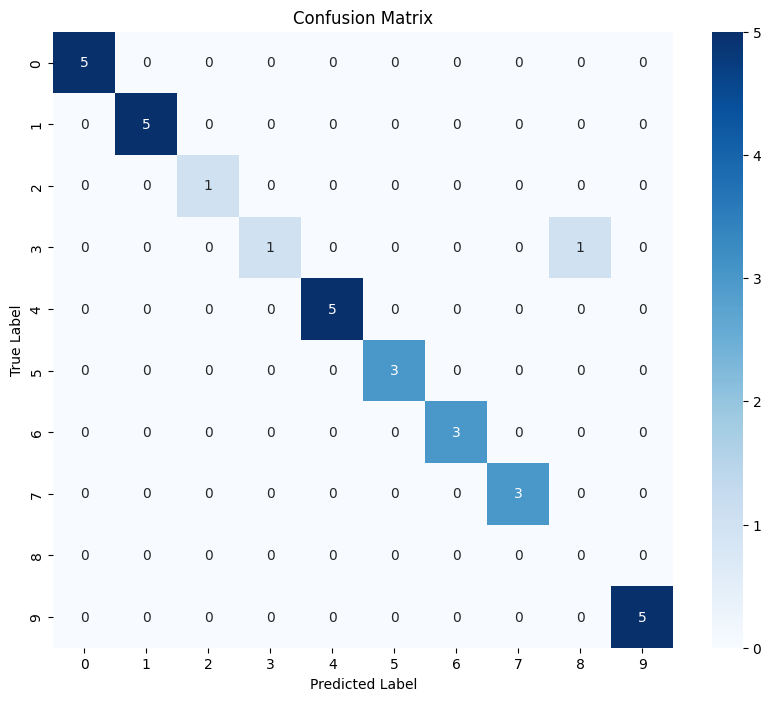

In [20]:
# Convert tensors to numpy arrays for confusion matrix
y_true = y.cpu().numpy()
y_pred = pred_labels.cpu().numpy()

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10)) # Assuming 10 classes in MNIST
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [21]:
# Create a random tensor of shape [1, 3, 64, 64]
random_tensor = torch.randn(1, 3, 64, 64)

# Define a function to test different kernel sizes
def test_kernel_size(kernel_size):
    conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=kernel_size)
    output_tensor = conv_layer(random_tensor)
    print(f"Kernel size: {kernel_size}, Output tensor shape: {output_tensor.shape}")

# Test with different kernel sizes
test_kernel_size(3)
test_kernel_size(5)
test_kernel_size(7)
test_kernel_size(1)


Kernel size: 3, Output tensor shape: torch.Size([1, 16, 62, 62])
Kernel size: 5, Output tensor shape: torch.Size([1, 16, 60, 60])
Kernel size: 7, Output tensor shape: torch.Size([1, 16, 58, 58])
Kernel size: 1, Output tensor shape: torch.Size([1, 16, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.6MB/s]


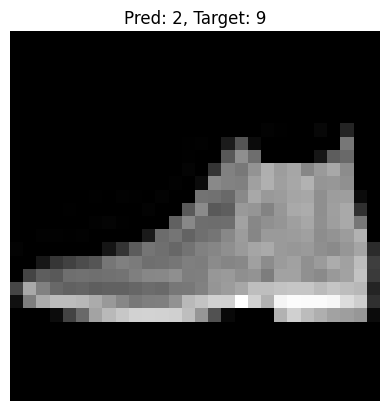

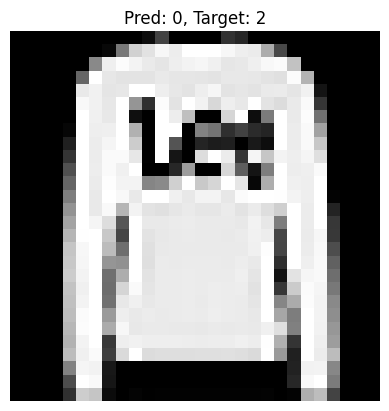

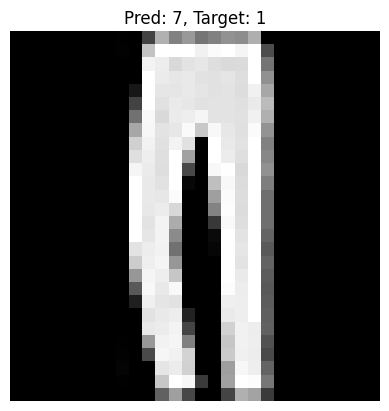

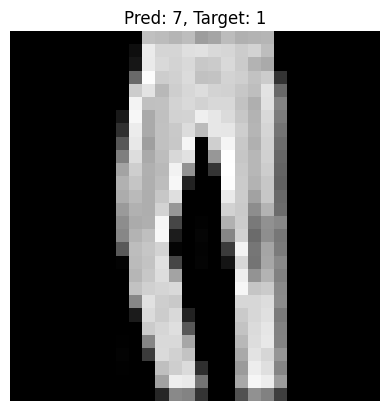

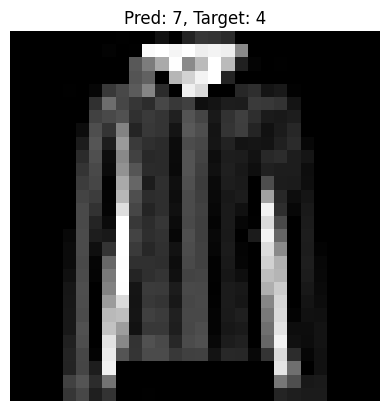

In [22]:
# Load FashionMNIST test data
test_data_fashion = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

test_dataloader_fashion = DataLoader(test_data_fashion, batch_size=32)

# Use the trained model_2 (assuming it's already trained)
# Make predictions and compare to actual labels

incorrect_predictions = []
with torch.inference_mode():
  for X, y in test_dataloader_fashion:
    X, y = X.to(device), y.to(device)
    pred_probs = model_2(X)
    pred_labels = torch.argmax(pred_probs, dim=1)
    for i in range(len(pred_labels)):
      if pred_labels[i] != y[i]:
        incorrect_predictions.append((X[i], pred_labels[i], y[i]))


# Visualize incorrect predictions
n_incorrect_to_plot = min(5, len(incorrect_predictions))
for i in range(n_incorrect_to_plot):
    image, pred_label, true_label = incorrect_predictions[i]
    plt.imshow(image.squeeze().cpu(), cmap="gray")
    plt.title(f"Pred: {pred_label.item()}, Target: {true_label.item()}")
    plt.axis("off")
    plt.show()

In [23]:
# Analysis
print("Analysis of incorrect predictions:")
print("Based on the visualized incorrect predictions, it appears that some of the misclassifications might be due to the inherent similarity between certain clothing items.")
print("For example, a shirt might be misclassified as a t-shirt, or a pullover as a cardigan. This suggests that the data error, in which data labels are too close to each other, plays a role.")
print("While the model could potentially benefit from further training or architectural adjustments, the inherent ambiguity in the data itself might pose a limitation on the model's accuracy.")

Analysis of incorrect predictions:
Based on the visualized incorrect predictions, it appears that some of the misclassifications might be due to the inherent similarity between certain clothing items.
For example, a shirt might be misclassified as a t-shirt, or a pullover as a cardigan. This suggests that the data error, in which data labels are too close to each other, plays a role.
While the model could potentially benefit from further training or architectural adjustments, the inherent ambiguity in the data itself might pose a limitation on the model's accuracy.
